<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#Лабораторная-работа-1.-Композиции-алгоритмов-(22-балла)" data-toc-modified-id="Лабораторная-работа-1.-Композиции-алгоритмов-(22-балла)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Лабораторная работа 1. Композиции алгоритмов (22 балла)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Оценивание-и-штрафы" data-toc-modified-id="Оценивание-и-штрафы-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Оценивание и штрафы</a></span></li></ul></li><li><span><a href="#Bias-Variance-decomposition-(6-баллов)" data-toc-modified-id="Bias-Variance-decomposition-(6-баллов)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bias-Variance decomposition (6 баллов)</a></span></li><li><span><a href="#Композиции-алгоритмов" data-toc-modified-id="Композиции-алгоритмов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Композиции алгоритмов</a></span><ul class="toc-item"><li><span><a href="#Bagging-+-RSM" data-toc-modified-id="Bagging-+-RSM-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Bagging + RSM</a></span></li><li><span><a href="#Градиентный-бустинг-(5-баллов)" data-toc-modified-id="Градиентный-бустинг-(5-баллов)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Градиентный бустинг (5 баллов)</a></span></li><li><span><a href="#Adaboost-(5-баллов)" data-toc-modified-id="Adaboost-(5-баллов)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Adaboost (5 баллов)</a></span></li><li><span><a href="#Стекинг-(6-баллов)" data-toc-modified-id="Стекинг-(6-баллов)-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Стекинг (6 баллов)</a></span></li></ul></li></ul></li></ul></div>

# imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

# Лабораторная работа 1. Композиции алгоритмов (22 балла)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

## Bias-Variance decomposition (6 баллов)

![](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

Сгенерируем следующую выборку: объектами будут являться $\ell = 20$ фиксированных точек $X~= \{x_1, \dots, x_\ell\}$, равномерно распределённых на отрезке $[0, \pi]$, а ответами $y_i = \cos(x_i) + N(0, 0.1)$.

**(1.3 балла) Задание 1.**  На рисунках ниже для разных семейств алгоритмов изображена истинная кривая зависимости ответов от объектов $y = \cos(x)$, а также кривые для $100$ алгоритмов, обученных на различных реализациях выборки. Охарактеризуйте смещение и разброс для каждого из четырёх методов. Ответ поясните.

<table>
    <tr>
        <td>
            <img src='bv_linear.png' width=350>
            <br>
            <div align="center">
                а) Линейная регрессия
            </div>
        </td>
        <td>
            <img src='bv_2nn.png' width=350>
            <br>
            <div align="center">
                б) kNN, $k = 2$
            </div>
        </td>
    </tr>
    <tr>
        <td>
            <img src='bv_svm_rbf_1.png' width=350>
            <br>
            <div align="center">
                в) SVM с RBF-ядром, $\gamma = 1$
            </div>
        </td>
        <td>
            <img src='bv_svm_rbf_100.png' width=350>
            <br>
            <div align="center">
                г) SVM с RBF-ядром, $\gamma = 100$
            </div>
        </td>
    </tr>
</table>

**Ответ.** 
Истинная кривая ответов $y=\cos(x)$ и будет являться минимумом среднеквадратичного риска $a^*(x)=E(y \mid x)=E(\cos(x) + \eta)=\cos(x)$.
Значение разброса (на глаз можно оценить как среднюю ширину полосы из предсказанных кривых) невелико для всех четырех методов. А вот смещение (среднее отклонение среднего предсказания от истинного) будет значительно больше в случае SVM($\gamma=100$).

**(2.7 балла) Задание 2.** Для описанной формулировки задачи некорректно говорить о смещении и разбросе на всём отрезке $[0, \pi]$. Объясните, почему. Предложите, как можно исправить условие, чтобы избежать этой некорректности. Перестройте графики к задаче для исправленного условия, и охарактеризуйте смещение и разброс на этих графиках для каждого из четырёх методов.

In [2]:
X = np.linspace(0, np.pi, 20)
X_test = np.linspace(0, np.pi, 100)
y_test = np.cos(X_test)
def gen_y(X):
    return np.cos(X) + np.random.normal(scale=0.1, size=len(X))

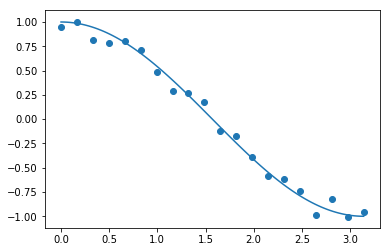

In [3]:
plt.scatter(X, gen_y(X))
plt.plot(X_test, y_test)
plt.show()

In [4]:
def clf_predict(X, y, X_test, clf):
    from sklearn.base import clone
    clf = clone(clf).fit(X.reshape(-1, 1), y)
    return clf.predict(X_test.reshape(-1, 1))    

In [5]:
def draw_preds(clf):
    preds = [clf_predict(X, gen_y(X), X_test, clf) for i in range(100)]
    print('bias = %f' % np.mean((np.mean(preds, axis=0) - y_test) ** 2))
    print('variance = %f' % np.mean(np.mean([(np.mean(preds, axis=0) - x) ** 2 for x in preds], axis=0)))
    [plt.plot(X_test, pred, c='b', linewidth=0.3) for pred in preds]
    plt.plot(X_test, y_test, c='r')
    plt.show()

bias = 0.001159
variance = 0.005240


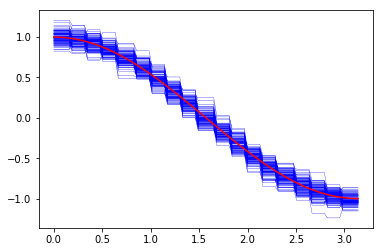

In [6]:
draw_preds(KNeighborsRegressor(2))

bias = 0.007897
variance = 0.001078


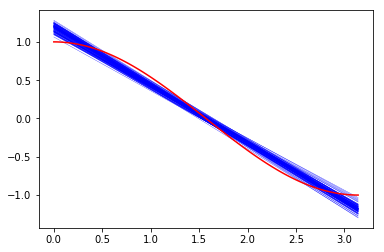

In [7]:
draw_preds(LinearRegression())

bias = 0.000798
variance = 0.002475


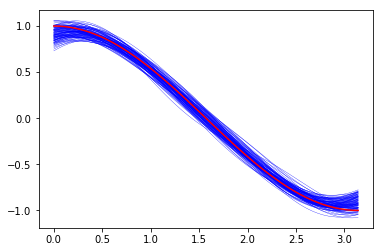

In [8]:
draw_preds(SVR(gamma=1))

bias = 0.016263
variance = 0.006756


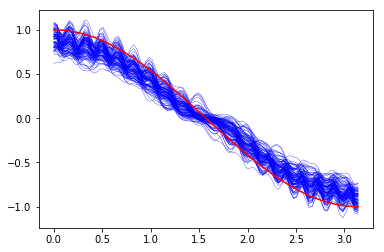

In [9]:
draw_preds(SVR(gamma=100))


Теперь рассмотрим другую задачу: регрессии со среднеквадратичной функцией потерь, а также некоторый алгоритм $a$. Тогда качество алгоритма $a$ может быть записано следующим образом:

$$Q(a) = \mathbb{E}_{X^l} \mathbb{E}_{x,y}(a(x) - y)^2,$$

где первое матожидание вычисляется по всевозможным обучающим выборкам $X^l$ размера $l$. К сожалению, на реальных данных эта формула неприменима из-за невозможности сгенерировать необходимые для оценки данные. Поэтому проведем приближенный численный эксперимент с эмпирическими оценками матожиданий.

С помощью бутстраппинга можно просемплировать из обучающей выборки $N$ новых выборок того же размера, тем самым "имитируя" пространство всевозможных обучающих выборок, после чего обучить на каждой выбранный алгоритм. Обозначим вектор истинных меток тестовой выборки за $y \in \mathbb{R}^{m}$. Векторы прогнозов для объектов из тестовой выборки для каждой модели обозначим за $\hat{y}_i \in \mathbb{R}^{m}, i \in \{1, .., N\}$. Тогда средний квадрат ошибки по всем моделям на тестовой выборке запишется как

$$error=\frac{1}{N}\sum_{i=1}^{N}MSE(y,\hat{y}_i).$$

Обозначим среднее предсказание за $$\overline{y} = \frac{1}{N}\sum_{i=1}^{N} \hat{y}_i.$$

Тогда квадрат отклонения среднего предсказания и разброс прогнозов относительно среднего предсказания всех моделей на тестовой выборке от истинных меток запишутся следующим образом, соответственно:

$$bias^2 = MSE(y, \overline y),$$

$$variance = \frac{1}{N}\sum_{i=1}^N MSE(\hat{y}_i, \overline y).$$


Для начала рассмотрим в качестве алгоритма решающее дерево. Как известно, при увеличении высоты дерева алгоритм может быть сильно чувствителен к составу обучающей выборки. Чтобы подтвердить эти предположения, проведите следующие эксперименты.

Загрузите [набор данных](http://archive.ics.uci.edu/ml/datasets/BlogFeedback). Каждый объект — пост в блоге. Он описывается различными признаками: длина текста поста, наличие наиболее частотных слов, день недели, количество комментариев за последние 24 часа и т.п., а так же целевым признаком — количеством комментариев к посту. Полный список признаков и описание находятся на странице датасета. 

Разбейте данные из файла **blogData_train.csv** на обучающую и тестовую выборки в пропорциях 1 к 4 соответственно. Обратите внимание, что обучающая выборка меньше тестовой. Такая большая тестовая выборка позволит сделать измерение качества моделей достаточно достоверным. 

In [10]:
data = pd.read_csv('./BlogFeedback/blogData_train.csv', header=None)
data.columns = data.columns + 1
N = 100
data.head()

,1,2,3,4,5,6,7,8,9,10,...,272,273,274,275,276,277,278,279,280,281
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [11]:
def split_X_y(data):
    X, y = data.loc[:, :280], data[281]
    return X, y

In [12]:
train, test = train_test_split(data, train_size=0.2)
print(train.shape, test.shape)

(10479, 281) (41918, 281)


c:\users\nadzeya_salahub\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


**(1.3 балла) Задание 3.** Постройте графики зависимости $error$, $bias^2$ и $variance$ от глубины решающего дерева (от 1 до 15 включительно) для $N=100$. 

In [13]:
def predict(train, test, estimator):
    X_train, y_train = split_X_y(train)
    X_test, y_test = split_X_y(test)
    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)
    return y_hat

In [42]:
train_samples = [train.sample(train.shape[0], replace=True) for _ in range(N)]

In [44]:
def calc_metrics(estimator, train_samples=train_samples, test=test):
    X_test, y_test = split_X_y(test)
        
    predictions = [predict(train, test, estimator) for train in train_samples]
    y_mean = np.mean(predictions, axis=0)
    
    error = np.mean([mean_squared_error(y_test, pred) for pred in predictions])
    
    bias2 = mean_squared_error(y_test, y_mean)
    
    variance = np.mean([mean_squared_error(pred, y_mean) for pred in predictions])
    
    return {'error': error,
            'bias2': bias2,
            'variance': variance}

In [45]:
metrics = {i: calc_metrics(DecisionTreeRegressor(max_depth=i)) for i in range(1, 16)}

In [46]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

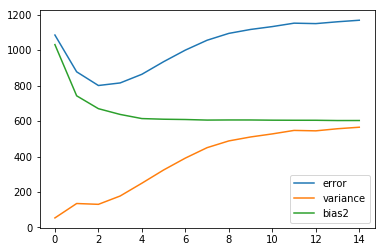

In [47]:
metrics_df.plot()
plt.show()

**(0.7 балла) Задание 4.** Являются ли какие-то из полученных графиков монотонными? А должны ли они быть монотонными, если бы гипотетически эксперименты были проведены на всевозможных выборках? Почему? Убедитесь численно, что верно bias-variance разложение ошибки: $$error = bias^2 + variance$$

**Ответ.** Графики $bias^2$ и $variance$ являются монотонными, a их сумма имеет выраженный минимум при $max\_depth=2$. 

In [48]:
metrics_df.assign(**{'bias2+variance': metrics_df.bias2 + metrics_df.variance}).iloc[:, [0, 3]]

,error,bias2+variance
0,1084.596540,1084.596540
1,877.303749,877.303749
2,800.163630,800.163630
3,814.614277,814.614277
4,863.418644,863.418644
5,934.360547,934.360547
6,999.696325,999.696325
7,1055.275751,1055.275751
8,1093.904751,1093.904751
9,1116.069421,1116.069421


## Композиции алгоритмов

Несмотря на описанный выше недостаток решающих деревьев, объединение их в композиции позволяет существенно улучшить качество предсказания. Рассмотрим несколько способов построения композиций.

### Bagging + RSM

![](https://sites.google.com/site/rajhansgondane2506/_/rsrc/1467898300734/publications/rrftrain.jpg?height=215&width=320)

Один из способов объединения алгоритмов в композиции — обучение каждого отдельного алгоритма на некоторой подвыборке из исходной выборки ([bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)) и подмножестве исходных признаков ([RSM](https://en.wikipedia.org/wiki/Random_subspace_method)). В sklearn этот тип композиции реализован в классе [BaggingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) (для случая регресии). Подобный подход также есть в реализации [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

### Градиентный бустинг (5 баллов)

В случае бустинга композиция алгоритмов строится последовательно. Каждый следующий базовый алгоритм акцентируется на тех объектах, на которых обученная ранее композиция допускала ошибку.

На данный момент одной из самых широко распространенных реализаций бустинга является библиотека [XGBoost](https://github.com/dmlc/xgboost). В ней большое внимание уделяется регуляризации и скорости, нежели в других реализациях бустинга (например,  [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) из sklearn). Кроме того, XGBoost позволяет оптимизировать различные функции потерь, а также более гибок, засчет большого числа параметров.

XGBoost строит композицию из $K$ базовых алгоритмов $b_k$:

$$ \hat{y}_i = \hat{y}_i^{K} = \sum_{k=1}^{K} b_k(x_i) = \hat{y}_i^{\left(K - 1\right)} + b_K(x_i), $$

минимизируя следующий функционал:

$$ Obj = \sum_{i=1}^N \mathcal{L}(y_i, \hat{y}_i ) + \sum_{k=1}^{K} \Omega(b_k),$$

где
 - $N$ — размер обучающей выборки;
 - $x_i, y_i, \hat{y}_i$ — i-ый объект, правильный ответ и предсказание модели для него;
 - $\hat{y}_i^{t}$ — предсказание композиции из $t$ уже обученных базовых алгоритмов для i-го объекта;
 - $\Omega$ — регуляризатор;
 - $\mathcal{L}(y_i, \hat{y}_i)$ — функция потерь.

Функционал, оптимизируемый на $t$-ой итерации:

$$ Obj^{(t)} = \sum_{i=1}^N \mathcal{L}\left(y_i, \hat{y}_i^{(t-1)} + b_t(x_i)\right) + \Omega(b_t).$$

В XGBoost реализовано несколько различных функций потерь, что позволяет решать задачи классификации (бинарной и мультиклассовой), регрессии и ранжирования. Вот некоторые из них:

- reg:linear — линейная регрессия
- reg:logistic — логистическая регрессия
- binary:logistic — логистическая регрессия
- multi:softmax — softmax функция потерь для многоклассовой классификации
- rank:pairwise — минимизация pairwise-функции потерь для задачи ранжирования

**(1.3 балла) Задание 5.** Какой функции потерь будет соответствовать градиентный бустинг, который на каждой итерации настраивается на разность между вектором истинных меток и текущим вектором предсказанных меток?

**Ответ.** При градиентном бустинге на каждой итерации базовый алгоритм настраивается на вектор антиградиента. Из условия 
$$-g=y-\hat y \Rightarrow$$
$$\mathcal{L'}(y_i, \hat y_i)=\hat y_i - y_i \Rightarrow$$
$$\mathcal{L}(y_i, \hat y_i)=\frac{1}{2}(\hat y_i - y_i) ^ 2.$$

**(1.3 балла) Задание 6.** Градиентный бустинг обучается на пяти объектах с функцией потерь для одного объекта
$$\mathcal{L}(\tilde y, y) = (\tilde y - y)^4$$

На некоторой итерации полученная композиция даёт ответ $(5, 10, 6, 3, 0)$. На какой вектор ответов будет настраиваться следующий базовый алгоритм, если истинный вектор ответов равен $(6, 8, 6, 4, 1)$?

**Ответ.** Следующий базовый алгоритм будет настраиваться на вектор антиградиента:
$$(-g_i)_{i=1}^5=4((\tilde y_i - y_i)^3)_{i=1}^{5}=4\cdot(-1, 8, 0, -1, -1)^T.$$

**(1.7 балл) Задание 7.** Проведите аналогичный эксперимент с bias-variance разложением для градиентного бустинга для количество алгоритмов 1, 5, 10, 25 и 50, используя в качестве базовых алгоритмов решающие деревья. Обратите внимание, что данная библиотека имеет два интерфейса (стандартный и аналог sklearn), названия параметров в которых могут отличаться.

In [49]:
metrics_xgb = {i: calc_metrics(xgb.XGBRegressor(n_estimators=i)) for i in [1, 5, 10, 25, 50]}

In [50]:
metrics_df_xgb = pd.DataFrame.from_dict(metrics_xgb, orient='index')

In [51]:
metrics_df_xgb

,error,variance,bias2
1,1248.610170,1.075291,1247.534891
5,905.041254,10.978600,894.062692
10,742.162711,23.072712,719.090005
25,650.644437,40.399982,610.244451
50,643.957841,49.798603,594.159226


In [52]:
metrics_df

,error,variance,bias2
0,1084.596540,54.005741,1030.590799
1,877.303749,135.182455,742.121295
2,800.163630,130.541109,669.622520
3,814.614277,177.470110,637.144167
4,863.418644,249.598800,613.819844
5,934.360547,324.179424,610.181123
6,999.696325,391.147905,608.548419
7,1055.275751,449.938595,605.337156
8,1093.904751,487.921486,605.983266
9,1116.069421,510.171939,605.897482


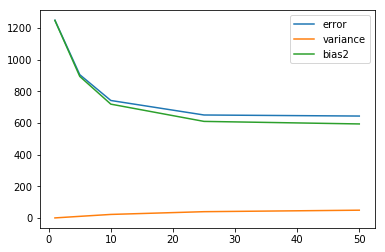

In [53]:
metrics_df_xgb.plot()
plt.show()

**(0.7 балла) Задание 8.** Отличаются ли графики в рассмотренных моделях (решающее дерево, градиентный бустинг на решающих деревьях)  между собой? На какую компоненту из разложения ошибки влияет объединение алгоритмов в рассмотренный тип композиции? Поясните свой ответ.

**Ответ.** В случае градиентного бустинга на порядок уменьшилась $variance$-компонента ошибки. 

### Adaboost (5 баллов)

**(2.5 балла) Задание 9.**   Обозначим через $\tilde w^{(N)}$ нормированный вектор весов
    на $N$-й итерации алгоритма AdaBoost.
    Покажите, что взвешенная ошибка базового классификатора $b_N$
    относительно весов со следующего шага $\tilde w_i^{(N + 1)}$
    равна $1/2$:
    $$
        \sum_{i = 1}^{\ell}
            \tilde w_i^{(N + 1)}
            [b_N(x_i) \neq y_i]
        =
        \frac{1}{2}.
    $$

**(2.5 балла) Задание 10.**
* Рассмотрим алгоритм AdaBoost - бустинг с экспоненциальной функцией потерь:
$$\mathcal{L}(M)=\exp(-M),$$
где $M$ - отступ объекта. Покажите, что алгоритм неучтойчив к шуму, т.е. возможен неограниченный рост отношения весов шумовых объектов по отношению к весам пороговых объектов.
* Покажите, что бустинг с логистической функцией потерь
$$\mathcal{L}(M) = \log (1+\exp(-M))$$
устойчив к шуму в описанном выше смысле.

*Примечание*. Пороговые объекты - это те, для которых значение отступа положительно и порядка нуля, то есть они лежат близко к границе между классами и в своём классе. Шумовые объекты лежат глубоко в чужом классе, на них отступ принимает большие отрицательные значения.

### Стекинг (6 баллов)
![](https://4.bp.blogspot.com/-hCxAb57kzDQ/VuMgHy3hAhI/AAAAAAAAAVk/djmL9IHv5QkLWeudjE50qDoCTbiUrTetA/s1600/Stacking.jpg)

[Stacking](https://en.wikipedia.org/wiki/Ensemble_learning#Stacking) — еще один способ объединить несколько алгоритмов в один, который часто используется как в решении реальных задач из промышленной сферы, так и в конкурсах на платформах вроде Kaggle. Подход использует понятие *базовых классификаторов*, каждый из которых независимо обучается на некотором (возможно одном и том же) множестве признаков, а также *мета-классификатора*, использующего предсказания базовых классификаторов как факторы. 

Загрузите [датасет](https://archive.ics.uci.edu/ml/datasets/covertype). В тренировочных целях предлагается вместо задачи мультиклассификации решать задачу обычной бинарной классификации — научиться отличать **Spruce-Fir** (значение целевой переменной — 1) от **Lodgepole Pine** (значение целевой переменной — 2). Разделите выборку на обучение и тест в соотношении 50/50. В качестве метрики используйте [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

**(1.5 балла) Задание 11.** Использование мета-классификатора подразумевает получение предсказаний от базовых классификаторов для тех объектов обучающей выборки, на которых мета-классификатор будет обучаться. В свою очередь базовые классификаторы тоже должны быть обучены на некоторой выборке. Чтобы избежать переобучения, обучающее множество делится на $n$ фолдов, $(n-1)$ из которых используются для обучения базовых классификаторов, а $n$-ый — для предсказания (вычисления мета-фактора).

Для получения мета-факторов для тестовых данных базовые классификаторы могут быть обучены на всем обучающем множестве, поскольку проблема переобучения здесь не возникает. Другими словами, если мы хотим посчитать факторы для тестового множества, мы можем спокойно использовать обучающее множество для тренировки базовых классификаторов. Если же мы хотим посчитать факторы для обучающего множества, то необходимо следить, чтобы классификатор не предсказывал для тех объектов, на которых обучался.

Мета-классификатор может быть обучен как на множестве исходных факторов, дополненным мета-факторами, так и исключительно на множестве мета-факторов. Выбор зависит от решаемой задачи.

Напишите функцию, которая получает на вход классификатор, обучающую и тестовые выборки, а также параметры [кросс-валидатора](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) и возвращающую значения мета-фактора для обучающего и тестового множеств

In [163]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.base import clone

In [160]:
cv = KFold(5)

In [162]:
list(cv.split(train))

[(array([ 2096,  2097,  2098, ..., 10476, 10477, 10478]),
  array([   0,    1,    2, ..., 2093, 2094, 2095])),
 (array([    0,     1,     2, ..., 10476, 10477, 10478]),
  array([2096, 2097, 2098, ..., 4189, 4190, 4191])),
 (array([    0,     1,     2, ..., 10476, 10477, 10478]),
  array([4192, 4193, 4194, ..., 6285, 6286, 6287])),
 (array([    0,     1,     2, ..., 10476, 10477, 10478]),
  array([6288, 6289, 6290, ..., 8381, 8382, 8383])),
 (array([   0,    1,    2, ..., 8381, 8382, 8383]),
  array([ 8384,  8385,  8386, ..., 10476, 10477, 10478]))]

In [166]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv, method='predict_proba', *args, **kwargs):
    train_meta = cross_val_predict(clone(clf), X_train, y_train, cv=cv, method=method)
    test_meta = getattr(clone(clf).fit(X_train, y_train), method)(X_test)
    return train_meta, test_meta

In [ ]:
compute_meta_feature()

Поэкспериментируйте со стекингом, ответьте на вопросы и обоснуйте наблюдения.

**(1.5 балла) Задание 12.** Обучите различные известные вам модели машинного обучения и сделайте из них стекинг-композицию. 
  
  Базовые алгоритмы могут отличаться друг от друга:
    - моделью машинного обучения,
    - гиперпараметрами (например, различные функции потерь или глубины деревьев),
    - набором факторов,
    - типом модели: для данной задачи можно использовать как классификаторы, так и регрессоры.
  
  Обратите внимание, что бинарные мета-факторы дают меньше полезного сигнала мета-классификатору, чем числовые, поэтому базовым классификаторам лучше возвращать вероятность/числовую функцию, чем метки классов.

**(1.3 балла) Задание 13.** Обучите мета-классификатор на различных наборах факторов:
    - исходные факторы,
    - исходные факторы + мета-факторы,
    - мета-факторы.
    
   Имеет ли смысл добавлять исходные факторы в мета-классификатор, если базовые классификаторы уже обучены на этом наборе? Удается ли добиться улучшения качества за счет стекинга? Какие классификаторы лучше сочетаются друг с другом в такой композиции?

**(0.7 балла) Задание 14.** Попробуйте разные размеры фолда при подсчете мета-факторов. Влияет ли размер на качество?

**(1 балл) Задание 15.** Зафиксируйте некоторый набор базовых классификаторов. Обучите поверх них линейную модель и сравните ее с мета-классификатором, который считает среднее по всем метафакторам. Дает ли преимущество линейная модель? О чем говорят коэффициенты линейной модели в данном случае?